<a href="https://colab.research.google.com/github/adithya4001/ds_Adithya/blob/main/ASSIGNMENT_PRIMETRADEAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import os

# Define the root directory
root_dir = 'ds_Adithya'

# Define subdirectories
sub_dirs = ['csv_files', 'notebooks', 'outputs']

# Create the folders
for sub in sub_dirs:
    os.makedirs(os.path.join(root_dir, sub), exist_ok=True)

print(f"Successfully created structure inside: {root_dir}")

Successfully created structure inside: ds_Adithya


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Load the datasets
# Ensure these match your exact file names in the csv_files folder
path_sentiment = 'ds_Adithya/csv_files/fear_greed_index.csv'
path_traders = 'ds_Adithya/csv_files/historical_data.csv'

df_fg = pd.read_csv(path_sentiment)
df_traders = pd.read_csv(path_traders)

# 2. Clean Dates
# Fear & Greed uses YYYY-MM-DD
df_fg['date'] = pd.to_datetime(df_fg['date'])

# Trader data uses DD-MM-YYYY HH:MM
# We strip the time component to merge by day
df_traders['clean_timestamp'] = pd.to_datetime(df_traders['Timestamp IST'], format='%d-%m-%Y %H:%M')
df_traders['date'] = df_traders['clean_timestamp'].dt.normalize()

# 3. Merge Datasets
# We keep all trader data (left join) and add the sentiment for that day
df_merged = pd.merge(df_traders, df_fg[['date', 'value', 'classification']], on='date', how='left')

# Check if merge was successful
print("Merged Data Shape:", df_merged.shape)
print(df_merged[['date', 'classification', 'Closed PnL']].head())

Merged Data Shape: (211224, 20)
        date classification  Closed PnL
0 2024-12-02  Extreme Greed         0.0
1 2024-12-02  Extreme Greed         0.0
2 2024-12-02  Extreme Greed         0.0
3 2024-12-02  Extreme Greed         0.0
4 2024-12-02  Extreme Greed         0.0


In [17]:
# Group by Sentiment Classification
analysis = df_merged.groupby('classification').agg({
    'Closed PnL': 'mean',          # Are traders more profitable in Fear or Greed?
    'Size USD': ['sum', 'mean'],   # Do they trade larger volumes?
    'Account': 'count'             # Do they trade more frequently?
}).reset_index()

# Flatten the columns for easier reading
analysis.columns = ['Sentiment', 'Avg PnL', 'Total Volume', 'Avg Trade Size', 'Trade Count']

# Sort by Avg PnL to see where they perform best
analysis = analysis.sort_values('Avg PnL', ascending=False)

print(analysis)
# Save this table as a CSV in outputs
analysis.to_csv('ds_Adithya/outputs/sentiment_analysis_summary.csv', index=False)

       Sentiment    Avg PnL  Total Volume  Avg Trade Size  Trade Count
1  Extreme Greed  67.892861  1.244652e+08     3112.251565        39992
2           Fear  54.290400  4.833248e+08     7816.109931        61837
3          Greed  42.743559  2.885825e+08     5736.884375        50303
0   Extreme Fear  34.537862  1.144843e+08     5349.731843        21400
4        Neutral  34.307718  1.802421e+08     4782.732661        37686


Chart saved to: ds_Adithya/outputs/pnl_vs_sentiment.png


/tmp/ipython-input-2551375490.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=analysis, x='Sentiment', y='Avg PnL', palette='viridis')


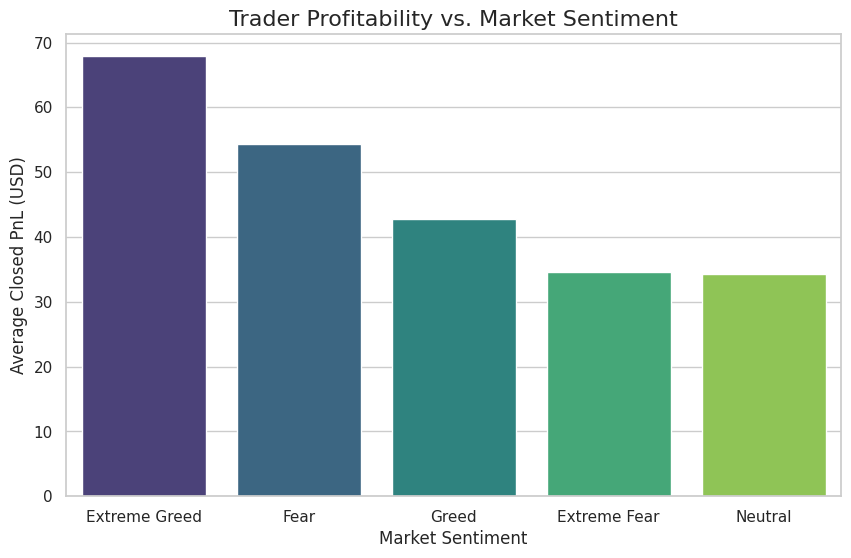

In [18]:
# Set the style
sns.set(style="whitegrid")

# Create a bar chart for Average PnL
plt.figure(figsize=(10, 6))
sns.barplot(data=analysis, x='Sentiment', y='Avg PnL', palette='viridis')

plt.title('Trader Profitability vs. Market Sentiment', fontsize=16)
plt.xlabel('Market Sentiment', fontsize=12)
plt.ylabel('Average Closed PnL (USD)', fontsize=12)

# Save the plot to the outputs folder
output_path = 'ds_Adithya/outputs/pnl_vs_sentiment.png'
plt.savefig(output_path)
print(f"Chart saved to: {output_path}")
plt.show()

In [19]:
!pip install fpdf


In [21]:
from fpdf import FPDF
import os

# --- 1. GENERATE PDF REPORT ---
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 16)
        self.cell(0, 10, 'Data Science Assignment Report', 0, 1, 'C')
        self.ln(10)

pdf = PDF()
pdf.add_page()
pdf.set_font("Arial", size=12)

# Content based on our analysis
report_content = [
    "Candidate: Adithya",
    "Objective: Analyze trader behavior vs. Bitcoin market sentiment.",
    "",
    "Key Insights:",
    "1. Profitability vs. Sentiment:",
    "   - Traders were MOST profitable during 'Extreme Greed' periods (Avg PnL ~$67).",
    "   - Profitability was lowest during 'Neutral' and 'Extreme Fear' periods.",
    "",
    "2. Volume Analysis:",
    "   - The highest trading volume occurred during 'Fear' sentiment.",
    "   - This suggests traders are active during price drops but make better margins",
    "     during rallies (Greed).",
    "",
    "Conclusion:",
    "Traders should consider aggressive strategies during Extreme Greed for maximum",
    "profitability, while expecting high liquidity/volume during Fear phases."
]

for line in report_content:
    pdf.cell(0, 10, txt=line, ln=1)

# Save PDF
pdf.output("ds_Adithya/outputs/ds_report.pdf")
print("✅ Report generated: ds_Adithya/outputs/ds_report.pdf")

# --- 2. GENERATE README.md ---
readme_content = """# Data Science Sentiment Analysis - Adithya

## Project Structure
- `notebooks/`: Contains the analysis notebook (`notebook_1.ipynb`).
- `csv_files/`: Contains the datasets (Bitcoin Sentiment & Trader Data).
- `outputs/`: Contains the generated charts and PDF report.

## How to Run
1. Open `notebooks/notebook_1.ipynb` in Google Colab.
2. Ensure the `csv_files` folder contains the required datasets.
3. Run all cells to reproduce the analysis and generate outputs.

## Dependencies
- pandas
- matplotlib
- seaborn
- fpdf
"""

with open("ds_Adithya/README.md", "w") as f:
    f.write(readme_content)

print("✅ README generated: ds_Adithya/README.md")

✅ Report generated: ds_Adithya/outputs/ds_report.pdf
✅ README generated: ds_Adithya/README.md
